# Overview Exercises:

### Be as specific as you can and answer for each of the following questions:

#### Formulate:
    - null hypothesis
    - alternative hypothesis

#### Give examples of:
    - true positive
    - true negative
    - type I error 
    - type II error

### 1. Has the network latency gone up since we switched internet service providers?

H0: Network latency has not changed since switching service providers.

HA: The new ISP has more network latency. 

True positive: Network latency is the same with both ISPs.

True negative: Network latency has increased since switching ISPs.

Type I error: We conclude network latency has increased when it actually has not.

Type II error: We believe network latency has remained the same when it has actually gone up.

### 2. Is the website redesign any good?

H0: The website design results in the same number of click-throughs as as before.

HA: The website design causes more click-throughs than prior.

True positive: We believe the number of click-throughs is the same and it actually is.

True negative: We believe there are more click-thoughs are there actually are.

Type I error: We believe there are more click-throughs but there are not.

Type II error: We believe the number of click-throughs is the same but it is actually more.

### 3. Is our television ad driving more sales?

H0: Our television ads have not affected our sales.

HA: Our television ads have affected our sales.

True positive: Our sales are the same and our sales have not changed.

True negative: Our sales increased with the ads and our sales actually increased.

Type I error: We believe our sales have increased but they have actually stayed the same.

Type II error: We believe our sales are the same but they have actually increased.

# T-Test Exercises:

In [1]:
import pandas as pd
import numpy as np
from pydataset import data
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import env

pd.options.display.max_columns = None

Do 1 and 3, number 2 is a bonus.

## 1. Answer with the type of test you would use (assume normal distribution):

- Is there a difference in grades of students on the second floor compared to grades of all students?
    - Answer: One sample t-test. 2-tail.
- Are adults who drink milk taller than adults who dont drink milk?
    - Answer: Two sample t-test. 1-tail.
- Is the the price of gas higher in texas or in new mexico?
    - Answer: Two sample t-test. 2-tail.
- Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?
    - Answer: ANOVA.

## 2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [2]:
office1_sample_size = 40
office1_mean = 90
office1_std = 15

office2_sample_size = 50
office2_mean = 100
office2_std = 20

alpha_realty = 0.05

In [3]:
office1 = stats.norm(office1_mean, office1_std)
office2 = stats.norm(office2_mean, office2_std)

In [4]:
office1_sample = office1.rvs(40)
office2_sample = office2.rvs(50)

In [5]:
t, p = stats.ttest_ind(office1_sample, office2_sample, equal_var = False)
t, p

(-2.847392396011477, 0.005486389859003025)

Hypothesis:
- H0:
- HA:

In [6]:
if p <= alpha_realty:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


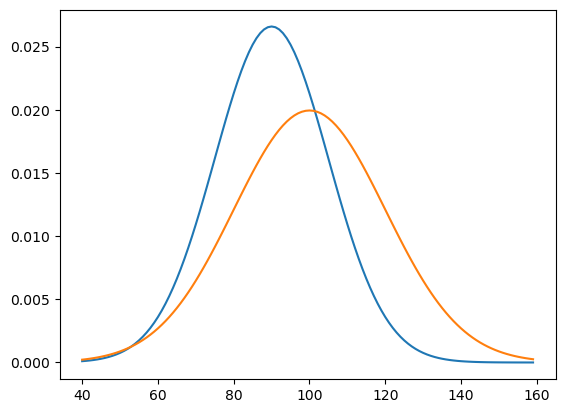

In [7]:
x_1 = np.arange(40, 160)
y_1 = stats.norm(90, 15).pdf(x_1)

y_2 = stats.norm(100, 20).pdf(x_1)


plt.plot(x_1,y_1)
plt.plot(x_1,y_2)

## 3. Load the mpg dataset (from pydataset) and use it to answer the following questions:

### Loaded info:

In [8]:
mpg = data('mpg')

In [9]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


### - Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [10]:
mpg['ave_fuel_use'] = (mpg.hwy + mpg.cty) / 2

Text(0, 0.5, 'Counts')

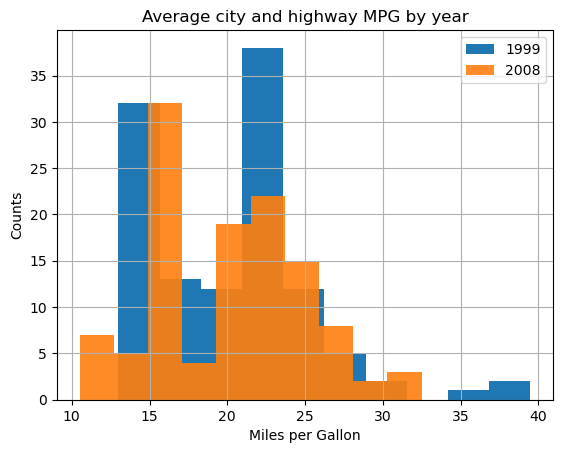

In [11]:
avg_mpg99 = mpg[mpg.year == 1999].ave_fuel_use
avg_mpg08 = mpg[mpg.year == 2008].ave_fuel_use

mpg[mpg.year == 1999].ave_fuel_use.hist(label='1999')
mpg[mpg.year == 2008].ave_fuel_use.hist(label='2008', alpha = 0.9)
plt.legend()
plt.title(f'Average city and highway MPG by year')
plt.xlabel(f'Miles per Gallon')
plt.ylabel(f'Counts')

Text(0, 0.5, 'Counts')

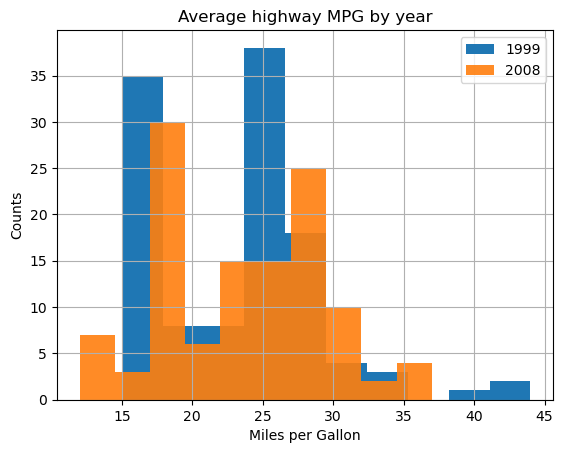

In [12]:
hwy_mpg99 = mpg[mpg.year == 1999].hwy
hwy_mpg08 = mpg[mpg.year == 2008].hwy

mpg[mpg.year == 1999].hwy.hist(label='1999')
mpg[mpg.year == 2008].hwy.hist(label='2008', alpha = 0.9)
plt.legend()
plt.title(f'Average highway MPG by year')
plt.xlabel(f'Miles per Gallon')
plt.ylabel(f'Counts')

Text(0, 0.5, 'Counts')

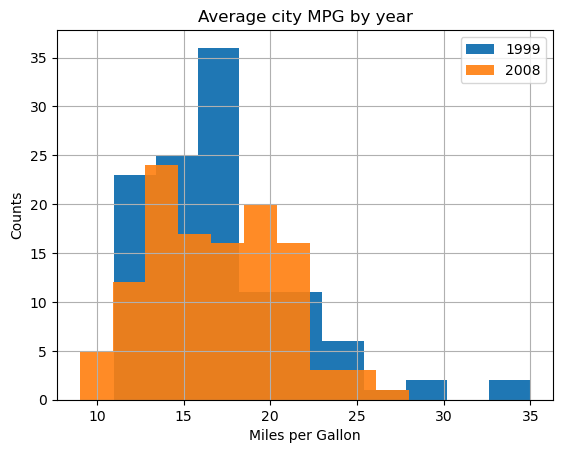

In [13]:
cty_mpg99 = mpg[mpg.year == 1999].cty
cty_mpg08 = mpg[mpg.year == 2008].cty

mpg[mpg.year == 1999].cty.hist(label='1999')
mpg[mpg.year == 2008].cty.hist(label='2008', alpha = 0.9)
plt.legend()
plt.title(f'Average city MPG by year')
plt.xlabel(f'Miles per Gallon')
plt.ylabel(f'Counts')

In [14]:
print(f' Variance for Average mpg in 1999: {avg_mpg99.var():.3f}')
print(f' Variance for Average mpg in 2008: {avg_mpg08.var():.3f}')
print("-----------------------------------------")
print(f' Variance for city mpg in 1999: {cty_mpg99.var():.3f}')
print(f' Variance for city mpg in 2008: {cty_mpg08.var():.3f}')
print("-----------------------------------------")
print(f' Variance for highway mpg in 1999: {hwy_mpg99.var():.3f}')
print(f' Variance for highway mpg in 2008: {hwy_mpg08.var():.3f}')

 Variance for Average mpg in 1999: 27.123
 Variance for Average mpg in 2008: 24.097
-----------------------------------------
 Variance for city mpg in 1999: 19.879
 Variance for city mpg in 2008: 16.453
-----------------------------------------
 Variance for highway mpg in 1999: 37.023
 Variance for highway mpg in 2008: 34.198


In [15]:
print(f' Mean for Average mpg in 1999: {avg_mpg99.mean():.3f}')
print(f' Mean for Average mpg in 2008: {avg_mpg08.mean():.3f}')
print("-----------------------------------------")
print(f' Mean for city mpg in 1999: {cty_mpg99.mean():.3f}')
print(f' Mean for city mpg in 2008: {cty_mpg08.mean():.3f}')
print("-----------------------------------------")
print(f' Mean for highway mpg in 1999: {hwy_mpg99.mean():.3f}')
print(f' Mean for highway mpg in 2008: {hwy_mpg08.mean():.3f}')

 Mean for Average mpg in 1999: 20.222
 Mean for Average mpg in 2008: 20.077
-----------------------------------------
 Mean for city mpg in 1999: 17.017
 Mean for city mpg in 2008: 16.701
-----------------------------------------
 Mean for highway mpg in 1999: 23.427
 Mean for highway mpg in 2008: 23.453


In [16]:
print(len(avg_mpg99))
print(len(avg_mpg08))
print(len(cty_mpg99))
print(len(cty_mpg08))
print(len(hwy_mpg99))
print(len(hwy_mpg08))

117
117
117
117
117
117


Hypothesis:
- H0: Average MPG in 2008 is <= average MPG in 1999.
- HA: Average MPG in 2008 is > average MPG in 1999.

Verify assumptions:

- Check that we have at least 30 observations.
    - Each group has 117 observations.
- Independence
    - Seems like it.
- Equal variance: 'equal_var' argument is True if equal and False if not equal.
    - I don't know, results for both options below.
    
Set alpha:

In [17]:
alpha = 0.05

In [18]:
t_ave, p_ave = stats.ttest_ind(avg_mpg99, avg_mpg08)
t_ave, p_ave
#equal_var=False output: (0.21960177245940962, 0.8263750772060638)
#equal_var=True output: (0.21960177245940962, 0.8263744040323578)

(0.21960177245940962, 0.8263744040323578)

In [19]:
if p_ave/2 > alpha:
    print("We fail to reject null hypothesis")
elif t_ave < 0:
    print("We fail to reject null hypothesis")
else:
    print("We reject the null hypothesis")

We fail to reject null hypothesis


In [20]:
t_cty, p_cty = stats.ttest_ind(cty_mpg99, cty_mpg08)
t_cty, p_cty
#equal_var=False output: (0.5674988409997608, 0.5709289258613233)
#equal_var=True output: (0.5674988409997608, 0.5709240495406107)

(0.5674988409997608, 0.5709240495406107)

In [21]:
if p_cty/2 > alpha:
    print("We fail to reject null hypothesis")
elif t_cty < 0:
    print("We fail to reject null hypothesis")
else:
    print("We reject the null hypothesis")

We fail to reject null hypothesis


In [22]:
t_hwy, p_hwy = stats.ttest_ind(hwy_mpg99, hwy_mpg08)
t_hwy, p_hwy
#equal_var=False output: (-0.03286431672888292, 0.973811089269393)
#equal_var=True output: (-0.03286431672888292, 0.9738110448529322)

(-0.03286431672888292, 0.9738110448529322)

In [23]:
if p_hwy/2 > alpha:
    print("We fail to reject null hypothesis")
elif t_hwy < 0:
    print("We fail to reject null hypothesis")
else:
    print("We reject the null hypothesis")

We fail to reject null hypothesis


#### Conclusion: We fail to reject the null hypothesis.
- H0: Average MPG in 2008 is <= average MPG in 1999.


### - Are compact cars more fuel-efficient than the average car?

In [24]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
 11  ave_fuel_use  234 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 23.8+ KB


In [25]:
compact = mpg[mpg['class'] == 'compact'].ave_fuel_use
print('Info for compact cars:')
print(f'Number of values: {len(compact):>13}')
print(f'Ave MPG: {compact.mean():>26.3f}')
print(f'MPG variance: {compact.var():>21.3f}')
print('------------------------------')
print(f'Info for all cars:')
print(f'Number of values: {len(mpg.ave_fuel_use):>14}')
print(f'Ave MPG of all cars: {mpg.ave_fuel_use.mean():>14.3f}')
print(f'MPG variance for all cars: {mpg.ave_fuel_use.var():>8.3f}')

Info for compact cars:
Number of values:            47
Ave MPG:                     24.213
MPG variance:                12.443
------------------------------
Info for all cars:
Number of values:            234
Ave MPG of all cars:         20.150
MPG variance for all cars:   25.505


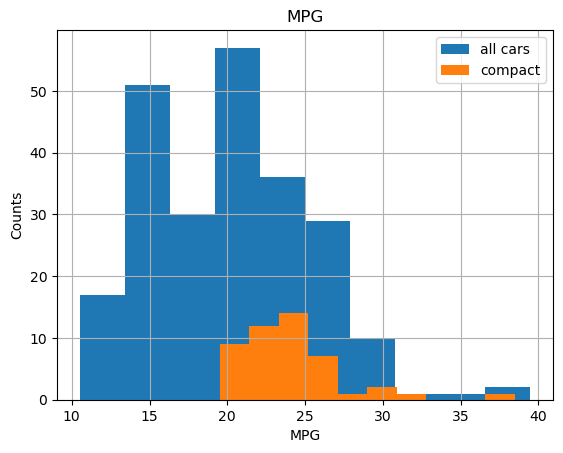

In [26]:
mpg.ave_fuel_use.hist(label = 'all cars')
compact.hist(label = "compact")

plt.title(f'MPG')
plt.xlabel(f'MPG')
plt.ylabel(f'Counts')
plt.legend()

Assumptions:

- Min 30 observations: (see counts above)
- Distribution "kinda" normal: 

Hypothesis:

- H0: Compact cars have the same fuel efficency as the average car.
- HA: Compact cars have better fuel effiency than the average car.

In [27]:
alpha = 0.05

In [28]:
mpg_all = mpg.ave_fuel_use.mean()

In [29]:
t_compact, p_compact = stats.ttest_1samp(compact, mpg_all)
t_compact, p_compact
#Output: (7.896888573132533, 4.198563794317163e-10)

(7.896888573132533, 4.198563794317163e-10)

In [30]:
if p_compact/2 > alpha:
    print("We fail to reject null hypothesis")
elif t_compact < 0:
    print("We fail to reject null hypothesis")
else:
    print("We reject the null hypothesis")

We reject the null hypothesis


**Takeaway:** Reject the null hypothesis, compact cars are significantly more efficient than the average car.

### - Do manual cars get better gas mileage than automatic cars?

In [31]:
manual = mpg[mpg.trans.str.startswith('m')].ave_fuel_use
auto = mpg[mpg.trans.str.startswith('a')].ave_fuel_use


print(f' Manual cars get an average mpg of: {manual.mean():>15.3f}')
print(f' Non-manual cars get an average mpg of: {auto.mean():>11.3f}')
print('------------------------------------------')
print(f' Manual cars mpg have a variance of: {manual.var():>14.3f}')
print(f' Non-manual cars mpg have a variance of: {auto.var():>10.3f}')


 Manual cars get an average mpg of:          22.227
 Non-manual cars get an average mpg of:      19.131
------------------------------------------
 Manual cars mpg have a variance of:         26.635
 Non-manual cars mpg have a variance of:     21.943


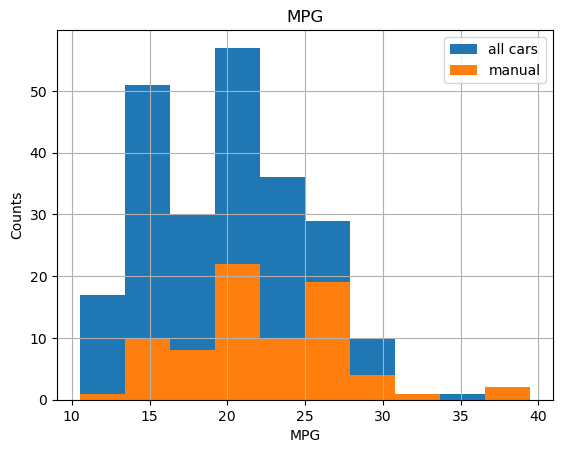

In [32]:
mpg.ave_fuel_use.hist(label = 'all cars')
manual.hist(label = "manual")

plt.title(f'MPG')
plt.xlabel(f'MPG')
plt.ylabel(f'Counts')
plt.legend()

Verify assumptions:

- Check that we have at least 30 observations.
- Independence
- Equal variance: 'equal_var' argument is True if equal and False if not equal.

In [33]:
print(f'There are: {len(auto)} observations in the automatic tranmission group.')
print(f'There are: {len(manual)} observations in the manual tranmission group.')

There are: 157 observations in the automatic tranmission group.
There are: 77 observations in the manual tranmission group.


Hypothesis:

- H0: Manual cars have the same fuel efficency as the average car.
- HA: Manual cars have better fuel effiency than the average car.

In [34]:
t_auto, p_auto = stats.ttest_ind(manual, auto, equal_var=False)
t_auto, p_auto
#Output: (4.443514012903072, 1.7952248999917893e-05)

(4.443514012903072, 1.7952248999917893e-05)

In [35]:
if p_auto/2 < alpha:
    print("We reject the null hypothesis")
elif t_auto > 0:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


**Takeaway:** Manual cars are significantly more effcient than automatic cars.

# Correlation Exercises:

## 1. Answer with the type of stats test you would use (assume normal distribution):
- Is there a relationship between the length of your arm and the length of your foot?
    - Answer: Pearson's Ror Spearman's R
- Do guys and gals quit their jobs at the same rate?
    - Answer: Independent t-test (2-tailed)
- Does the length of time of the lecture correlate with a students grade?
    - Answer: Pearson's R or Spearman's R

## 2. Use the telco_churn data.

Plan:
1. State our hypothesis
2. Select the data
3. Plot the data
4. Normality?
5. Run tests
6. Draw conclusions

Hypothesis:

- H0: There is no linear correlation between tenure and monthly charges.
- HA: There is a linear correlation between tenure and monthly charges.

In [36]:
alpha = 0.05

In [37]:
url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/telco_churn'

In [38]:
query = 'SELECT * FROM customers' # JOIN internet_service_type using(internet_service_type_id)'

In [39]:
telco_churn = pd.read_sql(query, url)

- Does tenure correlate with monthly charges?

In [40]:
telco_churn.sample(5)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
5395,7605-SNLQG,Female,0,Yes,No,45,Yes,No,1,No,No,Yes,No,No,No,1,Yes,4,50.25,2221.55,No
5258,7408-OFWXJ,Female,0,Yes,Yes,72,Yes,Yes,1,Yes,Yes,Yes,Yes,Yes,Yes,3,No,4,89.80,6510.45,No
6135,8690-ZVLCL,Female,0,Yes,Yes,68,Yes,Yes,1,Yes,Yes,Yes,Yes,Yes,Yes,3,No,4,88.00,6161.9,No
3342,4760-XOHVN,Female,0,Yes,Yes,1,Yes,No,3,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1,No,2,19.45,19.45,Yes
3911,5502-RLUYV,Female,0,Yes,Yes,69,Yes,Yes,2,No,Yes,Yes,No,Yes,Yes,1,Yes,1,103.95,7446.9,Yes


In [41]:
charges_df = telco_churn[['monthly_charges', 'tenure']]

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

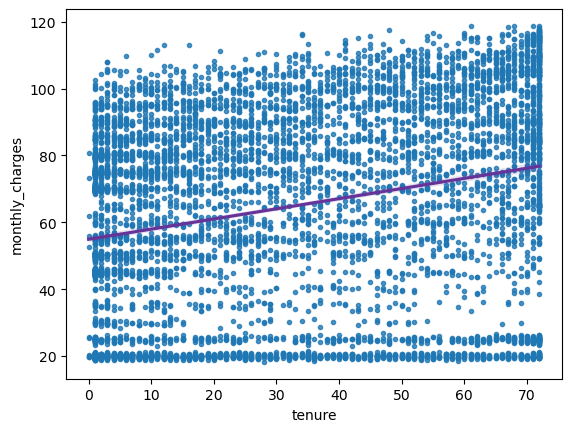

In [42]:
sns.regplot(x='tenure', y='monthly_charges', data=charges_df, marker='.', line_kws={'color':'rebeccapurple'})

Text(0, 0.5, 'Monthly Charges')

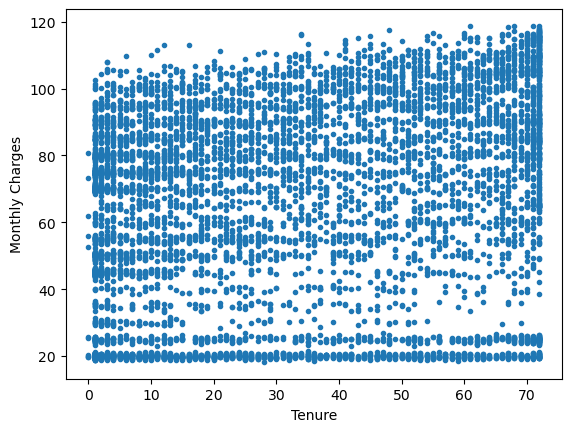

In [43]:
plt.scatter(x=telco_churn['tenure'], y=telco_churn['monthly_charges'], marker='.')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')

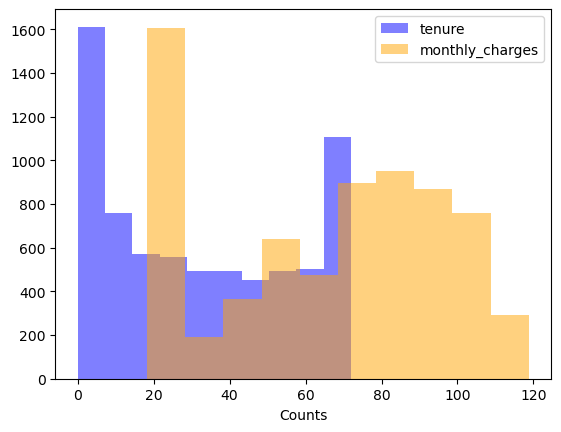

In [44]:
plt.hist(telco_churn['tenure'], color ='blue', alpha=0.5, label='tenure')
plt.hist(telco_churn['monthly_charges'], color = 'orange', alpha=0.5, label = 'monthly_charges')
plt.xlabel('Counts')
#plt.ylabel('
plt.legend()

The distrobution is not normal, so we will use Spearmans test.

In [45]:
#corr, p = stats.pearsonr(telco_churn['monthly_charges'], telco_churn['tenure'])
#corr, p #Should do pretty print statements...

#Output: (0.24789985628615002, 4.0940449915016345e-99)
# Weak Positive correlation.

In [46]:
corr, p = stats.spearmanr(telco_churn['monthly_charges'], telco_churn['tenure'])
corr, p
#Output: (0.2764167893313021, 1.0271266876411747e-123)

(0.2764167893313021, 1.0271266876411747e-123)

In [47]:
if p < alpha:
    print(f'Reject the HO hypothesis! There is a linear correlation between monthly charges and tenure. (p-value: {p})')

Reject the HO hypothesis! There is a linear correlation between monthly charges and tenure. (p-value: 1.0271266876411747e-123)


- Total charges?

In [48]:
#Removed blank spaces so string numbers could be changed to float:
telco_churn.loc[telco_churn['total_charges'] == ' ']

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
945,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,1,Yes,Yes,Yes,Yes,Yes,No,3,No,4,56.05,,No
1731,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,3,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,3,No,2,20.00,,No
1906,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,1,Yes,Yes,No,Yes,No,No,3,Yes,3,61.90,,No
2025,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,3,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,2,Yes,2,19.70,,No
2176,3115-CZMZD,Male,0,No,Yes,0,Yes,No,3,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,3,No,2,20.25,,No
2250,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,3,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,3,No,2,25.35,,No
2855,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,1,No,Yes,Yes,Yes,Yes,No,3,No,2,73.35,,No
3052,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,3,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,3,No,2,25.75,,No
3118,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,1,Yes,No,Yes,Yes,Yes,No,3,Yes,3,52.55,,No
4054,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,1,Yes,Yes,Yes,No,Yes,Yes,3,No,2,80.85,,No


In [49]:
telco_churn['total_charges'] = telco_churn['total_charges'].str.replace(' ','0')

In [50]:
telco_churn['total_charges'] = pd.to_numeric(telco_churn['total_charges'])

In [51]:
first_object = telco_churn['total_charges'].describe(include='all')
second_object = telco_churn['tenure'].describe(include='all')
keys = first_object.keys()
i = 0
print(f'Comparison of: {first_object.name} and {second_object.name}' )
print('-----------------------------------------------------')
print('-' * 9, first_object.name,'--', second_object.name,'---', 'Difference')
print('-----------------------------------------------------')
for i in range(len(first_object)):
    print(f'{keys[i]:<10} | {first_object[i]:^10.2f} | {second_object[i]:>10.2f} | {first_object[i] - second_object[i]:>10.2f}')
print('-----------------------------------------------------')

Comparison of: total_charges and tenure
-----------------------------------------------------
--------- total_charges -- tenure --- Difference
-----------------------------------------------------
count      |  7043.00   |    7043.00 |       0.00
mean       |  2279.73   |      32.37 |    2247.36
std        |  2266.79   |      24.56 |    2242.23
min        |    0.00    |       0.00 |       0.00
25%        |   398.55   |       9.00 |     389.55
50%        |  1394.55   |      29.00 |    1365.55
75%        |  3786.60   |      55.00 |    3731.60
max        |  8684.80   |      72.00 |    8612.80
-----------------------------------------------------


In [52]:
corr, p = stats.pearsonr(telco_churn['total_charges'], telco_churn['tenure'])
corr, p #Should do pretty print statements...

#Output: (0.8261783979502421, 0.0)
#Strong positive correlation.

(0.8261783979502421, 0.0)

In [53]:
corr, p = stats.spearmanr(telco_churn['total_charges'], telco_churn['tenure'])
corr, p
#Output: (0.8896957900597576, 0.0)

(0.8896957900597576, 0.0)

In [54]:
telco_churn.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn'],
      dtype='object')

<AxesSubplot:xlabel='tenure', ylabel='total_charges'>

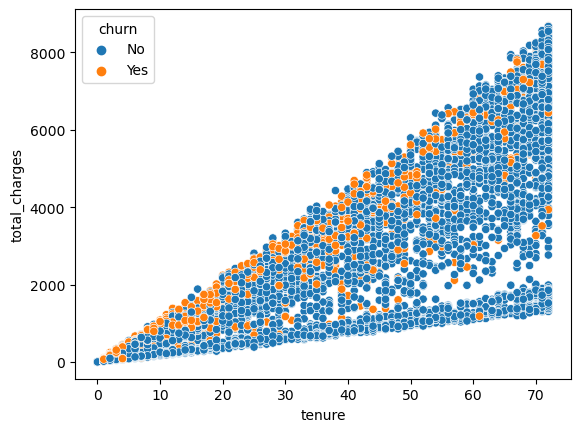

In [55]:
sns.scatterplot(x='tenure', y='total_charges', data=telco_churn, hue='churn')

Text(0, 0.5, 'Tenure')

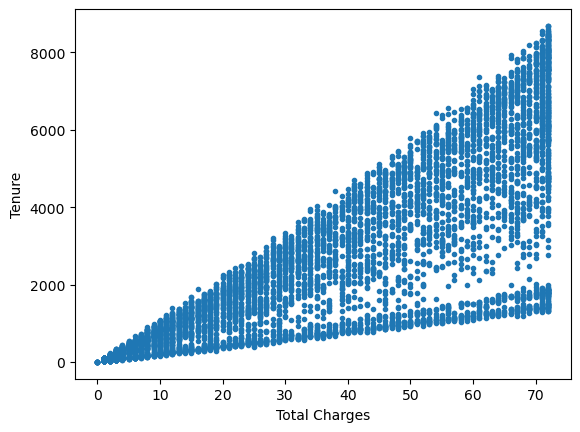

In [56]:
plt.scatter(y=telco_churn['total_charges'], x=telco_churn['tenure'], marker='.')
plt.xlabel('Total Charges')
plt.ylabel('Tenure')

- What happens if you control for phone and internet service?

Hypothesis:
- H0: There is no linear correlation between tenure and monthly charges
- HA: There is a linear correlation between tenure and monthly charges

In [57]:
phone_df = telco_churn[(telco_churn.phone_service == 'Yes') & (telco_churn.internet_service_type_id == 1)][['tenure', 'monthly_charges']]

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

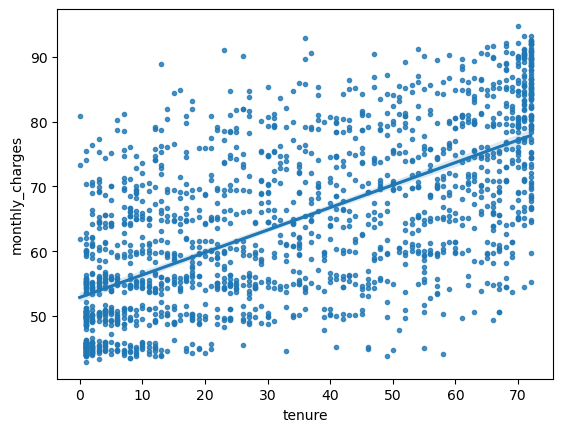

In [58]:
sns.regplot(x='tenure', y='monthly_charges', data=phone_df, marker = '.')

Text(0.5, 1.0, 'Colored by Internet Service Type')

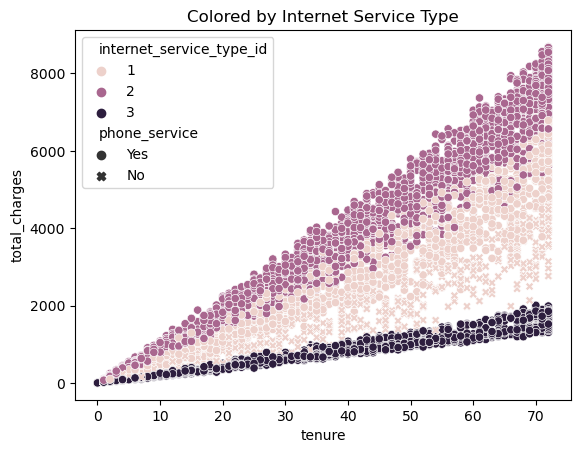

In [59]:
sns.scatterplot(x='tenure', y='total_charges', data=telco_churn, hue='internet_service_type_id', style='phone_service')
plt.title('Colored by Internet Service Type')

In [60]:
# Seperate out the five data types:
phone = telco_churn[telco_churn['phone_service'] == 'Yes']
no_phone = telco_churn[telco_churn['phone_service'] == 'No']

In [61]:
net1 = telco_churn[telco_churn['internet_service_type_id'] == 1]
net2 = telco_churn[telco_churn['internet_service_type_id'] == 2]
#net3 appears to be no internet service.
net3 = telco_churn[telco_churn['internet_service_type_id'] == 3]

<AxesSubplot:xlabel='tenure', ylabel='total_charges'>

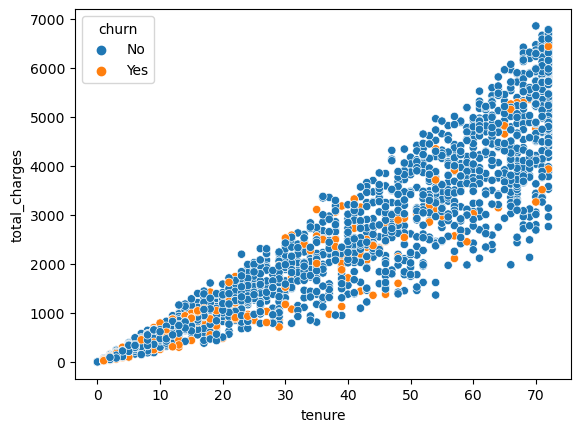

In [62]:
sns.scatterplot(x='tenure', y='total_charges', data=net1, hue='churn')

<AxesSubplot:xlabel='tenure', ylabel='total_charges'>

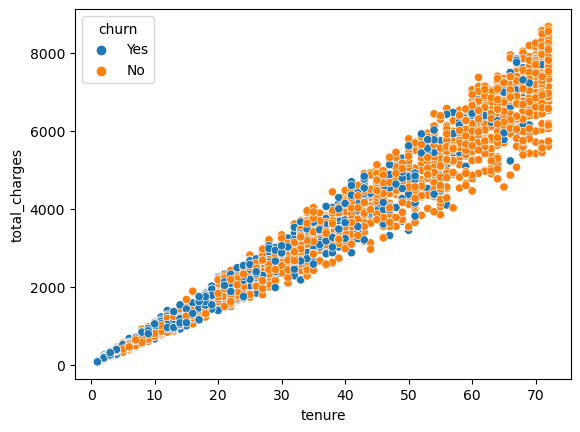

In [63]:
sns.scatterplot(x='tenure', y='total_charges', data=net2, hue='churn', palette='tab10')


<AxesSubplot:xlabel='tenure', ylabel='total_charges'>

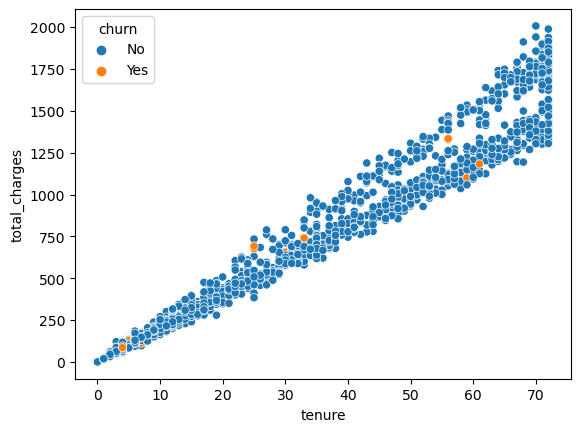

In [64]:
sns.scatterplot(x='tenure', y='total_charges', data=net3, hue='churn')

<AxesSubplot:xlabel='tenure', ylabel='total_charges'>

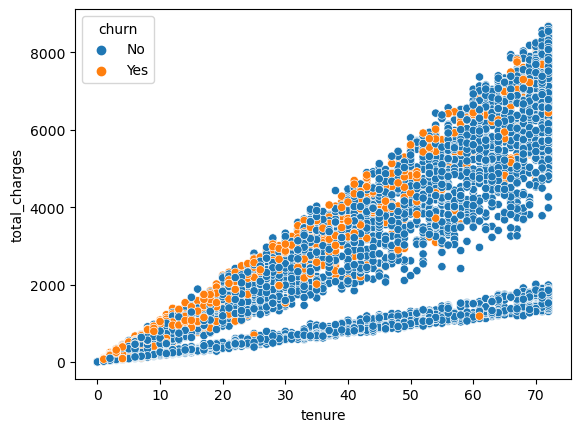

In [65]:
sns.scatterplot(x='tenure', y='total_charges', data=phone, hue='churn')

<AxesSubplot:xlabel='tenure', ylabel='total_charges'>

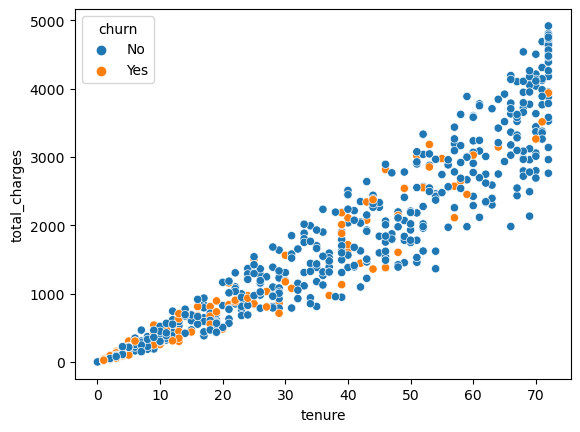

In [66]:
sns.scatterplot(x='tenure', y='total_charges', data=no_phone, hue='churn')

Use Spearman's test due to violation of normality.

In [67]:
r, p = stats.spearmanr(phone_df.tenure, phone_df.monthly_charges)
r, p

(0.6644708508462759, 5.423601644635052e-222)

**Takeaway:**

There is a moderate-strong correlation between tenure and monthly charges for customers who have only phone service.

## 3. Use the employees database.

In [68]:
query = "SELECT * FROM employees JOIN salaries USING (emp_no) WHERE to_date = '9999-01-01';"

In [69]:
url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/employees'

In [70]:
df = pd.read_sql(query, url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      240124 non-null  int64 
 1   birth_date  240124 non-null  object
 2   first_name  240124 non-null  object
 3   last_name   240124 non-null  object
 4   gender      240124 non-null  object
 5   hire_date   240124 non-null  object
 6   salary      240124 non-null  int64 
 7   from_date   240124 non-null  object
 8   to_date     240124 non-null  object
dtypes: int64(2), object(7)
memory usage: 16.5+ MB


Hypothesis:

-H0: There is no linear correlation between employee tenure and salary.
-HA: There is a linear correlation between employee tenure and salary.

In [71]:
alpha = 0.05

In [72]:
df['tenure'] = pd.to_datetime('today') - pd.to_datetime(df.hire_date)
df['tenure'] = df.tenure.astype('str').str.split(' ', expand=True)[0].astype('int')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      240124 non-null  int64 
 1   birth_date  240124 non-null  object
 2   first_name  240124 non-null  object
 3   last_name   240124 non-null  object
 4   gender      240124 non-null  object
 5   hire_date   240124 non-null  object
 6   salary      240124 non-null  int64 
 7   from_date   240124 non-null  object
 8   to_date     240124 non-null  object
 9   tenure      240124 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 18.3+ MB


In [74]:
tenure_df = df[['tenure', 'salary']]

<AxesSubplot:xlabel='tenure', ylabel='salary'>

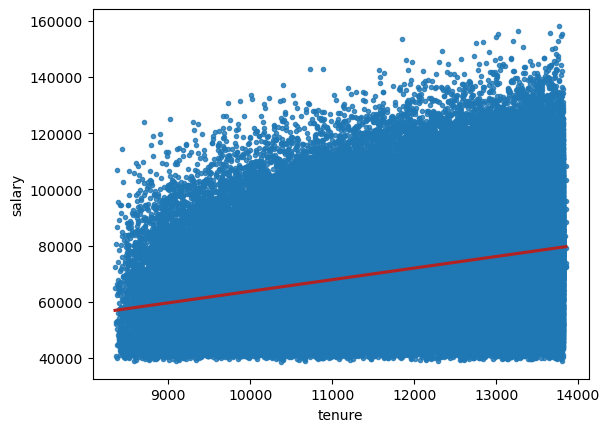

In [75]:
sns.regplot(x='tenure', y='salary', data=tenure_df, marker='.', line_kws=({'color':'Firebrick'}))

<AxesSubplot:>

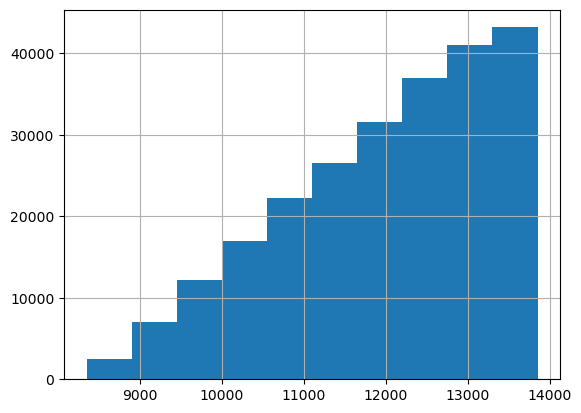

In [76]:
# Look at the distributionk look for normality

tenure_df.tenure.hist()

<AxesSubplot:>

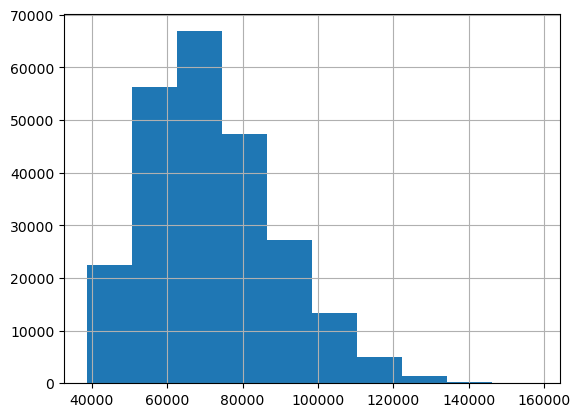

In [77]:
tenure_df.salary.hist()

Distrobutions are not normal so we use Spearman's R test:

In [78]:
r, p = stats.spearmanr(tenure_df.tenure, tenure_df.salary)
r, p

(0.3128783525010577, 0.0)

** Takeaway **

Reject the null hypothesis and there is a linear correlation (p-value: 0.0) and r-value: 0.31287835

- Is there a relationship between how long an employee has been with the company and their salary?

In [79]:
url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/employees'
employees = pd.read_sql('SELECT * FROM employees', url)
salary = pd.read_sql('SELECT * FROM salaries', url)
titles = pd.read_sql('SELECT * FROM titles', url)

Join employees and salary, then plot using hire date as the x and salary as the y.

In [80]:
salary.info() #convert to datetime object and count days!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844047 entries, 0 to 2844046
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   emp_no     int64 
 1   salary     int64 
 2   from_date  object
 3   to_date    object
dtypes: int64(2), object(2)
memory usage: 86.8+ MB


In [81]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      300024 non-null  int64 
 1   birth_date  300024 non-null  object
 2   first_name  300024 non-null  object
 3   last_name   300024 non-null  object
 4   gender      300024 non-null  object
 5   hire_date   300024 non-null  object
dtypes: int64(1), object(5)
memory usage: 13.7+ MB


In [82]:
#Creating datetime objects so pandas can parse them better:
employees.hire_date = pd.to_datetime(employees.hire_date)
employees.birth_date = pd.to_datetime(employees.birth_date)

In [83]:
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [84]:
salary.from_date = pd.to_datetime(salary['from_date'])
salary.to_date = pd.to_datetime(salary['to_date'], errors = 'coerce')
titles.from_date = pd.to_datetime(titles['from_date'])
titles.to_date = pd.to_datetime(titles['to_date'], errors = 'coerce')

1. Input current_date for nulls

In [85]:
#sns.histplot(data =salary, x='from_date', y='salary', hue='to_date')

You need a query which pulls start

In [86]:
""" 
SELECT DISTINCT * , emp_no, titles.to_date, salaries.salary FROM employees
JOIN salaries USING (emp_no)
JOIN titles USING (emp_no)
ORDER BY  emp_no, titles.to_date DESC;
"""

' \nSELECT DISTINCT * , emp_no, titles.to_date, salaries.salary FROM employees\nJOIN salaries USING (emp_no)\nJOIN titles USING (emp_no)\nORDER BY  emp_no, titles.to_date DESC;\n'

**See above**

- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

Hypothesis:

-H0: There is no linear correlation between employee tenure and number of titles.
-HA: There is a linear correlation between employee tenure and number of titles.

In [87]:
"""query =
SELECT t.emp_no, COUNT(t.title) from titles t 
JOIN (SELECT te.emp_no, MIN(te.from_date), MAX(te.to_date), DATEDIFF(now(), min(te.from_date)) AS tenure from titles 
GROUP BY te.emp_no 
HAVING MAX(to_date) = '9999-01-01') AS te USING (emp_no) GROUP BY t.emp_no;"""


"query =\nSELECT t.emp_no, COUNT(t.title) from titles t \nJOIN (SELECT te.emp_no, MIN(te.from_date), MAX(te.to_date), DATEDIFF(now(), min(te.from_date)) AS tenure from titles \nGROUP BY te.emp_no \nHAVING MAX(to_date) = '9999-01-01') AS te USING (emp_no) GROUP BY t.emp_no;"

In [88]:
#df1 = pd.read_sql(query, url)
#Doesn't work

Because the number of titles is a discrete value, we should run an ANOVA or Kruskal Wallis test to see if the average salary of those with 1 title is different from those with 2 or 2 different from 3, etc.

Assumptions change:
- Do they have equal variance?
- Are there enough observations?
- Are they independent?

In [89]:
#df.num_titles.value_counts()
#Doesn't work because my SQL query doesn't work

Update Hypothesis:

- H0: the variance is equal
- HA: the variance are significantly different

In [90]:
# stats.levene(df.num_titles, df.tenure)


Conclusion: There is a difference in tenure and number of titles an employee has held.

4. Use the sleepstudy data.

In [91]:
sleep = data('sleepstudy')

In [92]:
sleep.sample(5)

,Reaction,Days,Subject
96,391.8385,5,337
63,276.7693,2,333
67,332.0265,6,333
60,253.8644,9,332
160,372.2288,9,370


- Is there a relationship between days and reaction time?

H0: No linear correlation between days and reaction time
HA: Linear relation between days and reaction time

Text(0, 0.5, 'Reaction')

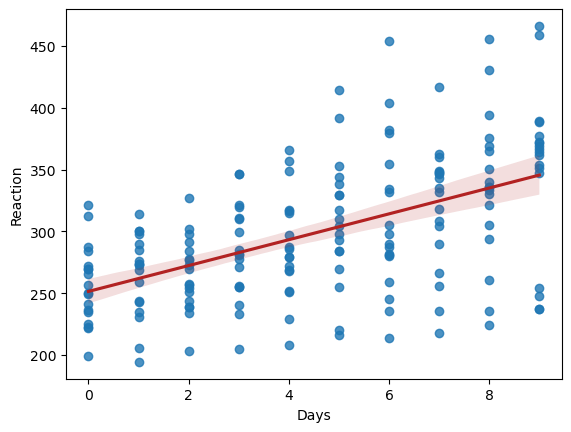

In [93]:
sns.regplot(x='Days',y='Reaction', data = sleep, line_kws=({'color':'Firebrick'}))
plt.xlabel('Days')
plt.ylabel("Reaction")

In [94]:
corr, p = stats.spearmanr(sleep['Reaction'], sleep['Days'])
corr, p #Should do pretty print statements...

#Output:(0.5228138502259547, 5.132878057706873e-14)
#Moderate/strong positive

(0.5228138502259547, 5.132878057706873e-14)

Reject the null and there is a strong positive linear correlation!

# Chi Squared exercises:

In [95]:
url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/employees'

# Chi Squared exercises:

1. Answer with the type of stats test you would use (assume normal distribution):

- Do students get better test grades if they have a rubber duck on their desk?
    - Answer: T-test, single tail
- Does smoking affect when or not someone has lung cancer?
    - Answer: Poisson.pmf, 
- Is gender independent of a person’s blood type?
    - Answer: Chi^2
- A farming company wants to know if a new fertilizer has improved crop yield or not
    - Answer: T-test, single tail
- Does the length of time of the lecture correlate with a students grade?
    - Answer: Chi^2
- Do people with dogs live in apartments more than people with cats?
    - Answer: Binomial (Dogs = success) Maybe ANOVA

2. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

            Codeup Student	Not Codeup Student
Uses a Macbook	49	20
Doesn't Use A Macbook	1	30

In [96]:
codeup = {'mac':49,'no_mac':1}
non_codeup = {'mac':1, 'no_mac':30}
codeup_mac = pd.DataFrame.from_records([codeup, non_codeup], index = ['codeup', 'non_codeup'])
codeup_mac

,mac,no_mac
codeup,49,1
non_codeup,1,30


In [97]:
observed = pd.crosstab(codeup, non_codeup)
observed

col_0,1,30
row_0,,
1,0,1
49,1,0


In [98]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [99]:
# print 'Observed Values' followed by a new line
print('Observed Values\n')

# print the values from the 'observed' dataframe
print(observed.values)

# print --- and then a new line, 'Expected Values', followed by another new line
print('---------\nExpected Values\n')

# print the expected values array
print(expected.astype(int))

# print a new line
print('---------\n')

# print the chi2 value, formatted to a float with 4 digits. 
print(f'chi^2 = {chi2:.4f}') 

# print the p-value, formatted to a float with 4 digits. 
print(f'p     = {p:.4f}')

Observed Values

[[0 1]
 [1 0]]
---------
Expected Values

[[0 0]
 [0 0]]
---------

chi^2 = 0.0000
p     = 1.0000


3. Choose another 2 categorical variables from the mpg dataset and perform a $chi^2$ contingency table test with them. Be sure to state your null and alternative hypotheses.

Hypothesis:
-H0: The class is independent of the engine_size.
-HA: The class is dependent on the engine_size.

In [100]:
alpha = 0.05

In [101]:
mpg = data('mpg')
car_class = mpg['class']
engine_size = mpg['displ']

In [102]:
observed = pd.crosstab(car_class, engine_size)
observed

displ,1.6,1.8,1.9,2.0,2.2,2.4,2.5,2.7,2.8,3.0,3.1,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.2,4.4,4.6,4.7,5.0,5.2,5.3,5.4,5.6,5.7,5.9,6.0,6.1,6.2,6.5,7.0
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2seater,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,1
compact,0,9,1,12,2,4,6,0,7,2,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
midsize,0,2,0,2,2,8,4,0,3,4,3,1,0,5,2,0,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
minivan,0,0,0,0,0,1,0,0,0,1,0,5,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
pickup,0,0,0,0,0,0,0,3,0,0,0,0,2,0,0,2,0,2,2,2,0,3,9,0,4,0,2,0,1,1,0,0,0,0,0
subcompact,5,3,2,7,2,0,4,3,0,0,0,0,0,0,0,0,2,0,2,0,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0
suv,0,0,0,0,0,0,6,2,0,1,0,2,2,0,0,1,0,1,10,1,1,4,8,2,1,5,5,1,5,1,1,1,0,1,0


In [103]:
chi2, p, degf, expected = stats.chi2_contingency(observed)


In [104]:
# print 'Observed Values' followed by a new line
print('Observed Values\n')

# print the values from the 'observed' dataframe
print(observed.values)

# print --- and then a new line, 'Expected Values', followed by another new line
print('---\nExpected Values\n')

# print the expected values array
print(expected.astype(int))

# print a new line
print('---\n')

# print the chi2 value, formatted to a float with 4 digits. 
print(f'chi^2 = {chi2:.4f}') 

# print the p-value, formatted to a float with 4 digits. 
print(f'p     = {p:.4f}')

Observed Values

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  2  0  0  0  2  0  1]
 [ 0  9  1 12  2  4  6  0  7  2  3  1  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  2  2  8  4  0  3  4  3  1  0  5  2  0  3  0  0  1  0  0  0  0
   0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  1  0  5  0  0  0  0  3  0  1  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  2  0  0  2  0  2  2  2  0  3  9  0
   4  0  2  0  1  1  0  0  0  0  0]
 [ 5  3  2  7  2  0  4  3  0  0  0  0  0  0  0  0  2  0  2  0  0  4  0  0
   0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  6  2  0  1  0  2  2  0  0  1  0  1 10  1  1  4  8  2
   1  5  5  1  5  1  1  1  0  1  0]]
---
Expected Values

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 2 0 4 1 2 4 1 2 1 1 1 0 1 0 0 1 0 3 0 0 2 3 0 1 1 1 0 1 0 0 0 0 0 0]
 [0 2 0 3 1 2 3 1 1 1 1 1 0 0 0 0 1 0 2 0 0 1

4. Use the data from the employees database to answer these questions:

- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

- H0: Gender is independent of working in sales or marketing. 

- HA: Gender is correlates with working in sales or marketing.

In [105]:
query = """
SELECT * FROM employees 
LEFT JOIN dept_emp USING(emp_no) 
LEFT JOIN departments USING (dept_no) 
WHERE dept_emp.to_date = '9999-01-01'
AND (departments.dept_name LIKE 'Marketing'
OR departments.dept_name LIKE 'Sales');"""

In [106]:
employees = pd.read_sql(query, url)
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52543 entries, 0 to 52542
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   dept_no     52543 non-null  object
 1   emp_no      52543 non-null  int64 
 2   birth_date  52543 non-null  object
 3   first_name  52543 non-null  object
 4   last_name   52543 non-null  object
 5   gender      52543 non-null  object
 6   hire_date   52543 non-null  object
 7   from_date   52543 non-null  object
 8   to_date     52543 non-null  object
 9   dept_name   52543 non-null  object
dtypes: int64(1), object(9)
memory usage: 4.0+ MB


In [107]:
employees.dept_name

0        Marketing
1        Marketing
2        Marketing
3        Marketing
4        Marketing
           ...    
52538        Sales
52539        Sales
52540        Sales
52541        Sales
52542        Sales
Name: dept_name, Length: 52543, dtype: object

In [108]:
observed = pd.crosstab(employees.gender, employees.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [109]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [110]:
# print 'Observed Values' followed by a new line
print('Observed Values\n')

# print the values from the 'observed' dataframe
print(observed.values)

# print --- and then a new line, 'Expected Values', followed by another new line
print('---\nExpected Values\n')

# print the expected values array
print(expected.astype(int))

# print a new line
print('---\n')

# print the chi2 value, formatted to a float with 4 digits. 
print(f'chi^2 = {chi2:.4f}') 

# print the p-value, formatted to a float with 4 digits. 
print(f'p     = {p:.4f}')

Observed Values

[[ 5864 14999]
 [ 8978 22702]]
---
Expected Values

[[ 5893 14969]
 [ 8948 22731]]
---

chi^2 = 0.3240
p     = 0.5692


- Is an employee's gender independent of whether or not they are or have been a manager?

In [113]:
query = """SELECT * FROM employees
LEFT JOIN dept_manager USING(emp_no)
;"""

In [114]:
managers = pd.read_sql(query, url)
managers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      300024 non-null  int64 
 1   birth_date  300024 non-null  object
 2   first_name  300024 non-null  object
 3   last_name   300024 non-null  object
 4   gender      300024 non-null  object
 5   hire_date   300024 non-null  object
 6   dept_no     24 non-null      object
 7   from_date   24 non-null      object
 8   to_date     24 non-null      object
dtypes: int64(1), object(8)
memory usage: 20.6+ MB


In [118]:
managers['leader_experience'] = managers.dept_no.notnull()

In [119]:
observed = pd.crosstab(managers.gender, managers.leader_experience)
observed

leader_experience,False,True
gender,,
F,120038,13
M,179962,11


In [120]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [121]:
# print 'Observed Values' followed by a new line
print('Observed Values\n')

# print the values from the 'observed' dataframe
print(observed.values)

# print --- and then a new line, 'Expected Values', followed by another new line
print('---\nExpected Values\n')

# print the expected values array
print(expected.astype(int))

# print a new line
print('---\n')

# print the chi2 value, formatted to a float with 4 digits. 
print(f'chi^2 = {chi2:.4f}') 

# print the p-value, formatted to a float with 4 digits. 
print(f'p     = {p:.4f}')

Observed Values

[[120038     13]
 [179962     11]]
---
Expected Values

[[120041      9]
 [179958     14]]
---

chi^2 = 1.4567
p     = 0.2275


# More Examples:

Choose several continous and categorical variables that were not covered in the lesson and perform each type of test on them. You may use another data set if you wish.